In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import os
import numpy as np
from scipy.ndimage.filters import gaussian_filter

import imstackview.imstackview as imstackview

In [3]:
path_out = "examples"

# Generate image sequence

In [4]:
# Image size:
n_frames, n_slices, n_height, n_width = (6, 20, 30, 40)
# Point source position:
pos_ps = n_slices/2, n_height/2, n_width/2

image_stack = np.zeros((n_slices, n_height, n_width))
image_stack[pos_ps] = 10.

image_sequence = np.zeros((n_frames, n_slices, n_height, n_width))
for frame in np.arange(n_frames):
    image_sequence[frame] = gaussian_filter((frame + 1)*image_stack, [frame + 1]*3)
    
image_stack = image_sequence[2]

# Project image stack

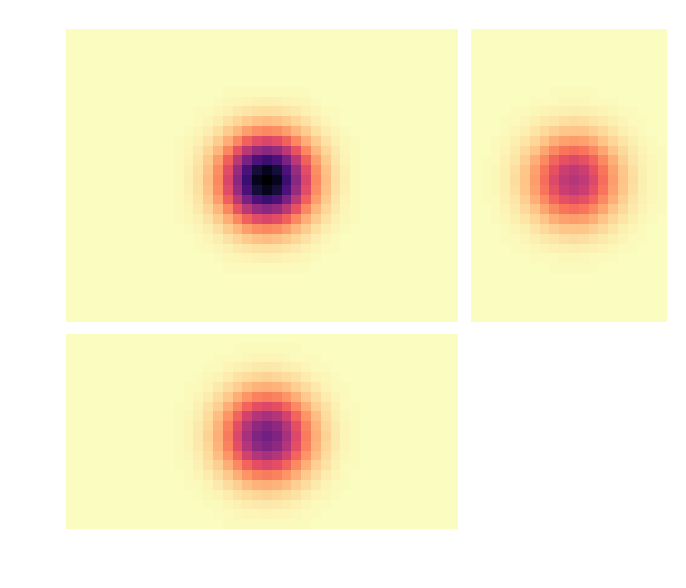

In [5]:
fig, ax = imstackview.project_image_stack(image_stack)
fig.savefig(os.path.join(path_out, "project_image_stack.png"))

# Show image stack

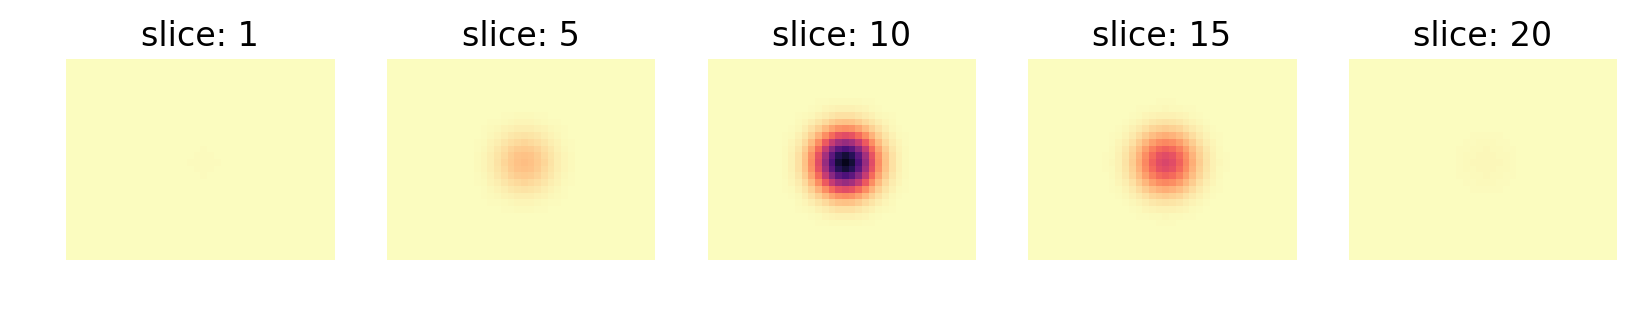

In [6]:
slices = np.linspace(0, n_slices - 1, 5, dtype=np.uint8)
fig, axes = imstackview.show_image_stack(
    image_stack, slices,
    labels=["slice: {}".format(s + 1) for s in slices])
fig.savefig(os.path.join(path_out, "show_image_stack.png"))

# Project image sequence

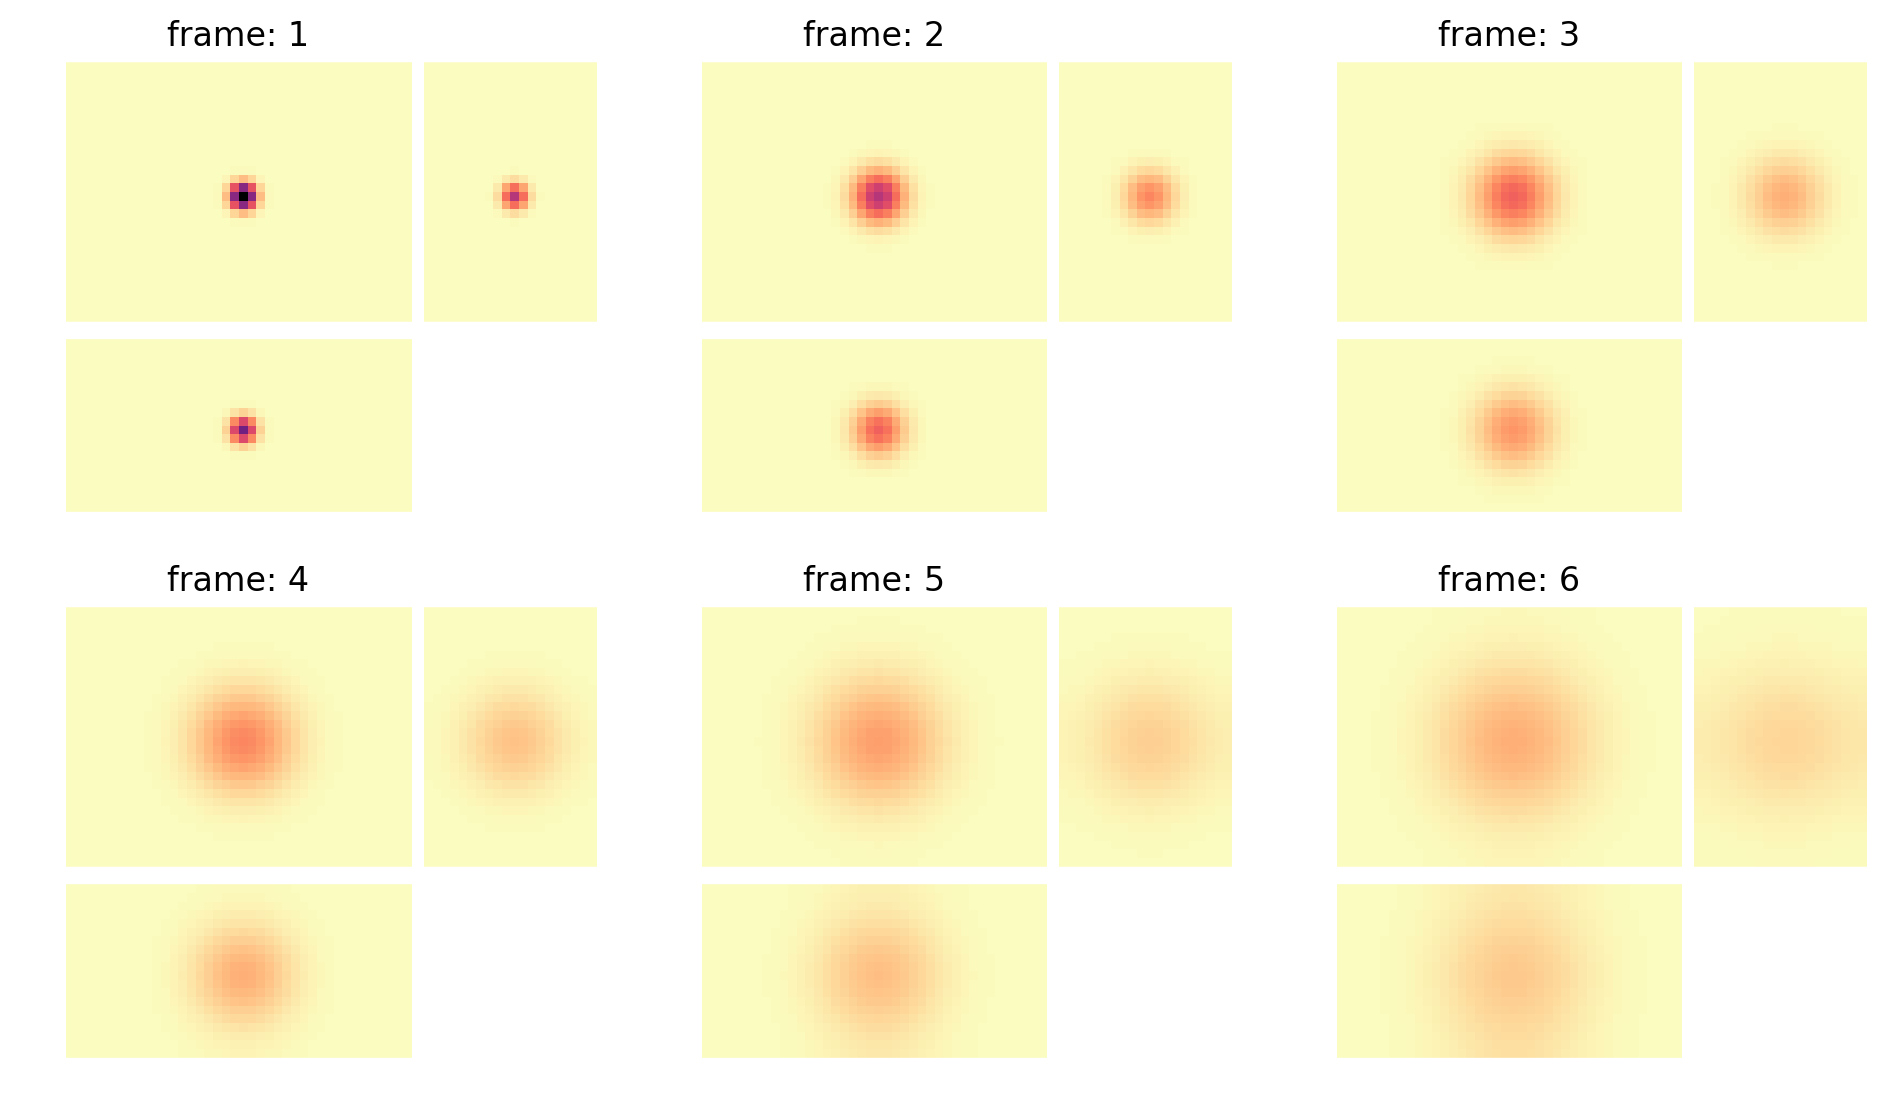

In [7]:
frames = np.linspace(0, n_frames - 1, n_frames, dtype=np.uint8)
fig, ax = imstackview.project_image_sequence(
    image_sequence, frames=frames, n_col=3,
    labels=["frame: {}".format(frame + 1) for frame in frames], normalise=True)
fig.savefig(os.path.join(path_out, "project_image_sequence.png"))

# Project high density regions

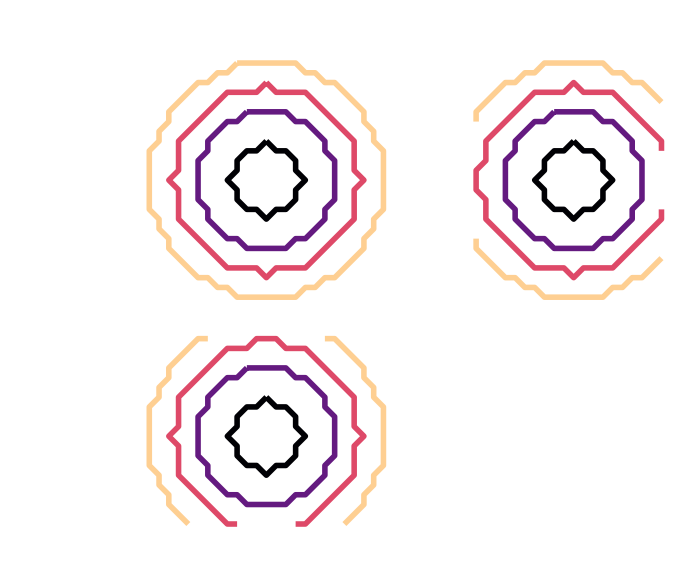

In [8]:
fig, ax = imstackview.project_hdr_stack(image_stack, levels=[0.5, 0.75, 0.9, 0.99], linewidths=2)
fig.savefig(os.path.join(path_out, "project_hdr_stack.png"))

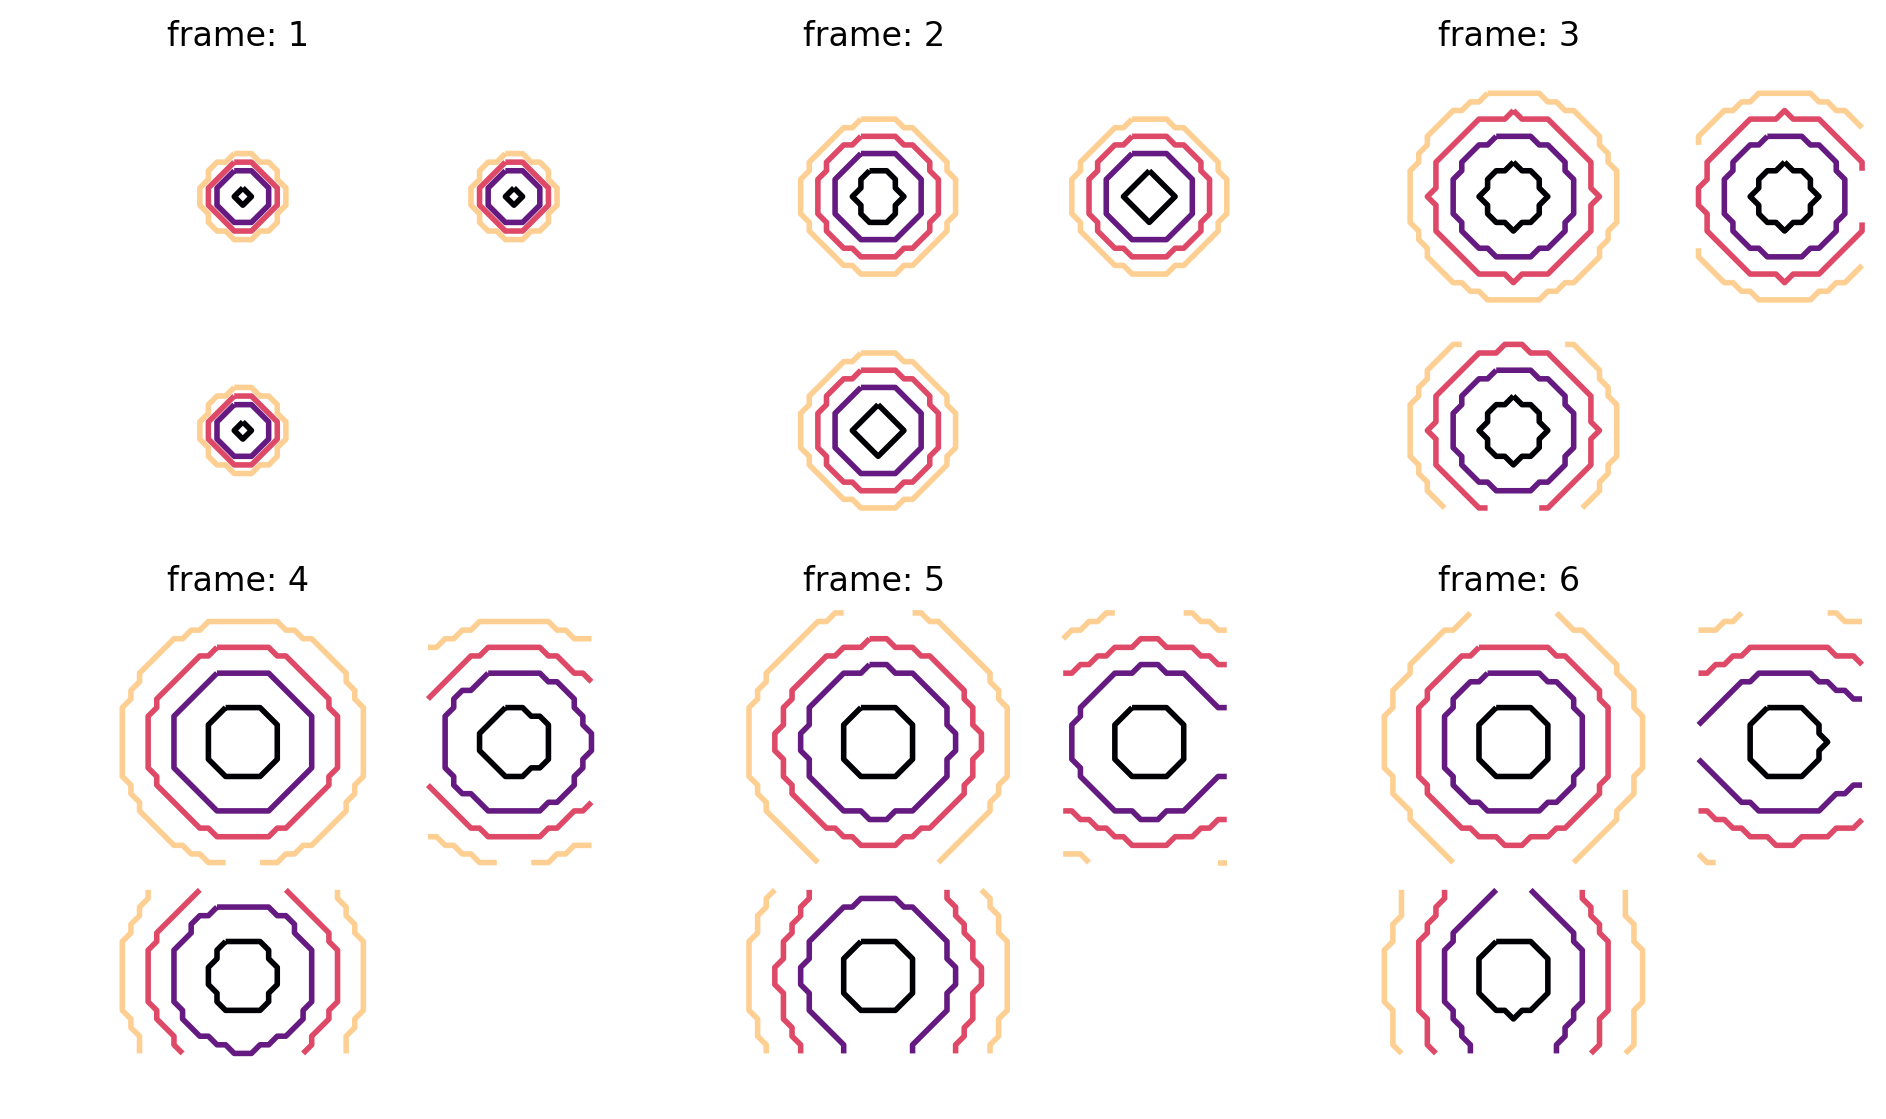

In [9]:
fig, ax = imstackview.project_hdr_sequence(
    image_sequence, levels=[0.5, 0.75, 0.9, 0.99], linewidths=2,
    frames=frames, n_col=3,
    labels=["frame: {}".format(frame + 1) for frame in frames])
fig.savefig(os.path.join(path_out, "project_hdr_sequence.png"))

# Overlayed projections

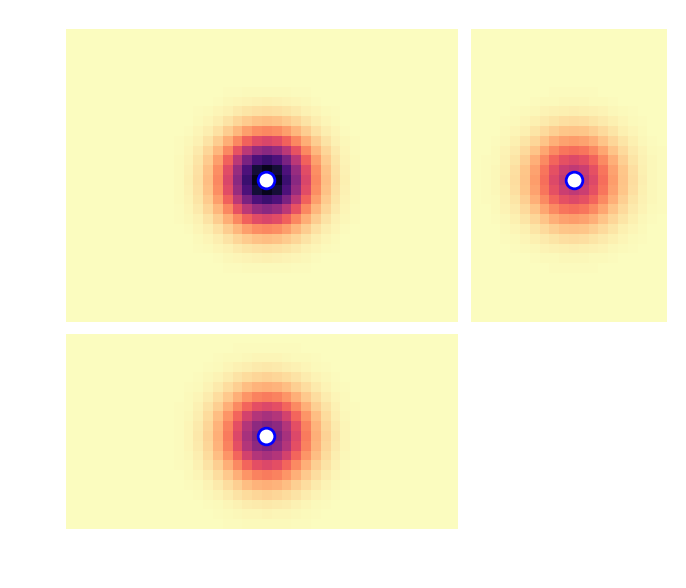

In [10]:
fig, ax = imstackview.project_image_stack(image_stack)
imstackview.draw_points_on_stack_projections(ax, pos_ps)
fig.savefig(os.path.join(path_out, "project_image_stack-overlay_points.png"))

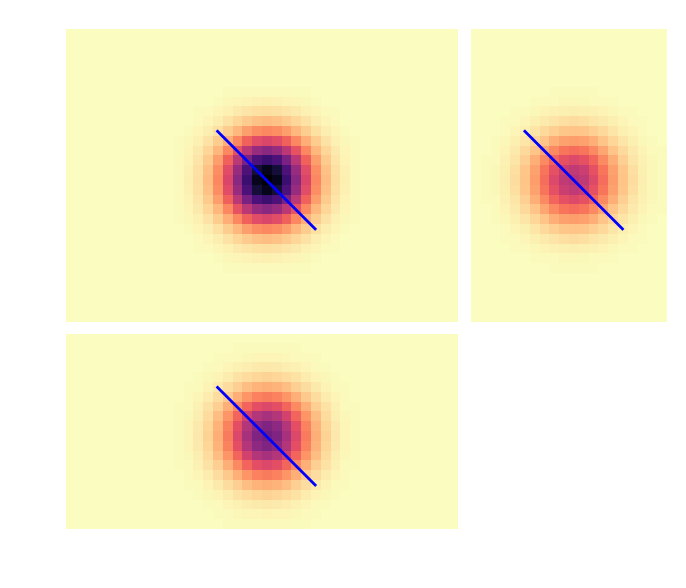

In [11]:
fig, ax = imstackview.project_image_stack(image_stack)
imstackview.draw_line_segment_on_stack_projections(ax, np.array(pos_ps) - 5, np.array(pos_ps) + 5)
fig.savefig(os.path.join(path_out, "project_image_stack-overlay_line_segment.png"))

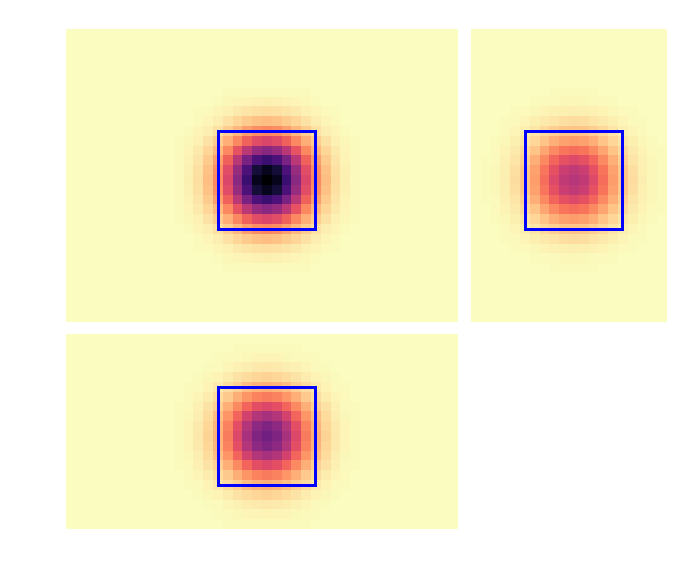

In [12]:
fig, ax = imstackview.project_image_stack(image_stack)
imstackview.draw_box_on_stack_projections(ax, (np.array(pos_ps) - 5, np.array(pos_ps) + 5))
fig.savefig(os.path.join(path_out, "project_image_stack-overlay_box.png"))

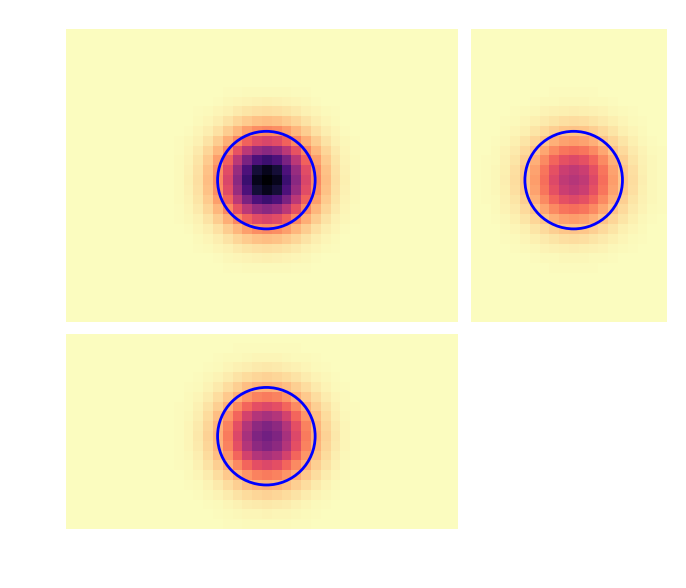

In [13]:
fig, ax = imstackview.project_image_stack(image_stack)
imstackview.draw_circle_on_stack_projections(ax, pos_ps, 5)
fig.savefig(os.path.join(path_out, "project_image_stack-overlay_circle.png"))

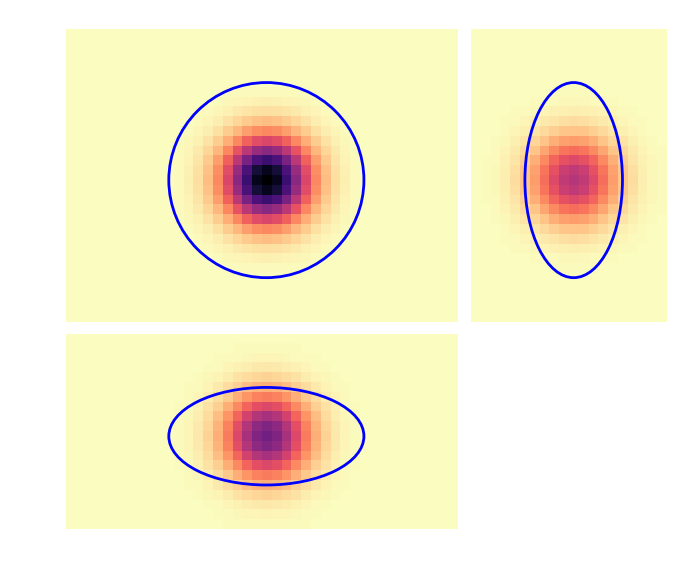

In [14]:
fig, ax = imstackview.project_image_stack(image_stack)
imstackview.draw_ellipse_on_stack_projections(ax, pos_ps, (5, 10, 10))
fig.savefig(os.path.join(path_out, "project_image_stack-overlay_ellipse.png"))

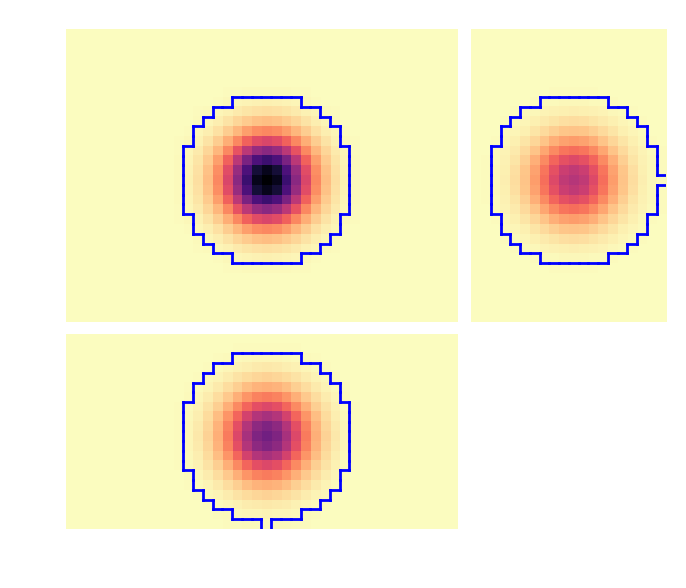

In [15]:
fig, ax = imstackview.project_image_stack(image_stack)
imstackview.outline_pixels_on_stack_projections(ax, image_stack > 0.001)
fig.savefig(os.path.join(path_out, "project_image_stack-outline_pixels.png"))